In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG3**

In [ ]:
import pandas as pd
 
temp_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg3.csv")
temp_alg3 = temp_alg3.drop(['Unnamed: 0'], axis=1)
print(temp_alg3)

     id  alg  time    3    4    5    6    7    8    9  ...  99993  99994  \
0     1    1     1  941  939  941  941  941  940  940  ...    941    941   
1     1    1     2  941  941  941  942  940  940  940  ...    941    940   
2     1    1     3  941  941  940  941  940  939  940  ...    941    940   
3     1    1     4  941  941  940  939  940  940  940  ...    939    940   
4     1    1     5  941  940  940  940  940  940  940  ...    940    941   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    1   996  939  939  941  939  940  939  940  ...    940    938   
996  10    1   997  941  941  940  938  940  939  940  ...    938    939   
997  10    1   998  940  939  941  941  940  938  940  ...    940    939   
998  10    1   999  939  940  939  940  938  939  940  ...    940    940   
999  10    1  1000  939  940  939  939  939  940  939  ...    940    939   

     99995  99996  99997  99998  99999  100000  100001  100002  
0      941    940    9

In [ ]:
Y = temp_alg3.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = temp_alg3.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,99993,99994,99995,99996,99997,99998,99999,100000,100001,100002
0,941,939,941,941,941,940,940,940,941,940,...,941,941,941,940,940,941,941,941,941,940
1,941,941,941,942,940,940,940,941,941,941,...,941,940,941,940,939,940,940,940,940,940
2,941,941,940,941,940,939,940,941,941,940,...,941,940,940,940,940,939,940,941,940,940
3,941,941,940,939,940,940,940,941,940,940,...,939,940,940,941,941,940,941,940,941,940
4,941,940,940,940,940,940,940,941,942,941,...,940,941,940,941,940,940,941,941,940,940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,939,939,941,939,940,939,940,939,940,939,...,940,938,939,939,940,939,938,939,940,940
996,941,941,940,938,940,939,940,939,939,939,...,938,939,939,939,940,939,939,940,939,939
997,940,939,941,941,940,938,940,939,940,940,...,940,939,940,938,940,939,939,939,939,938
998,939,940,939,940,938,939,940,940,939,940,...,940,940,940,941,939,940,940,940,940,939


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

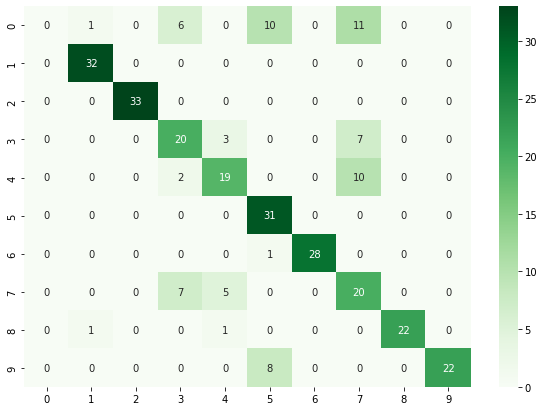

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.94      1.00      0.97        32
           3       1.00      1.00      1.00        33
           4       0.57      0.67      0.62        30
           5       0.68      0.61      0.64        31
           6       0.62      1.00      0.77        31
           7       1.00      0.97      0.98        29
           8       0.42      0.62      0.50        32
           9       1.00      0.92      0.96        24
          10       1.00      0.73      0.85        30

    accuracy                           0.76       300
   macro avg       0.72      0.75      0.73       300
weighted avg       0.72      0.76      0.73       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


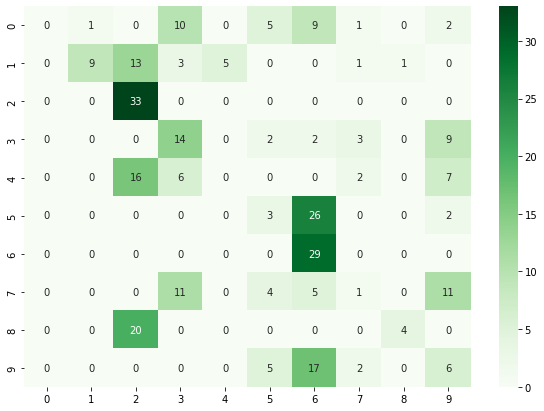

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           2       0.90      0.28      0.43        32
           3       0.40      1.00      0.57        33
           4       0.32      0.47      0.38        30
           5       0.00      0.00      0.00        31
           6       0.16      0.10      0.12        31
           7       0.33      1.00      0.50        29
           8       0.10      0.03      0.05        32
           9       0.80      0.17      0.28        24
          10       0.16      0.20      0.18        30

    accuracy                           0.33       300
   macro avg       0.32      0.32      0.25       300
weighted avg       0.31      0.33      0.25       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **VOLT ALG3**

In [ ]:
import pandas as pd
 
volt_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg3.csv")
volt_alg3 = volt_alg3.drop(['Unnamed: 0'], axis=1)
print(volt_alg3)

     id  alg  time     3     4     5     6     7     8     9  ...  99993  \
0     1    1     1  1490  1490  1492  1489  1491  1489  1489  ...   1489   
1     1    1     2  1489  1490  1489  1489  1490  1491  1490  ...   1489   
2     1    1     3  1489  1490  1490  1489  1489  1490  1490  ...   1490   
3     1    1     4  1490  1489  1489  1489  1489  1490  1490  ...   1490   
4     1    1     5  1489  1490  1490  1490  1490  1489  1489  ...   1490   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    1   996  1503  1503  1503  1502  1504  1503  1503  ...   1503   
996  10    1   997  1502  1502  1502  1503  1503  1504  1503  ...   1503   
997  10    1   998  1503  1503  1503  1503  1503  1504  1504  ...   1503   
998  10    1   999  1503  1503  1503  1503  1502  1503  1503  ...   1503   
999  10    1  1000  1503  1502  1503  1503  1503  1502  1503  ...   1503   

     99994  99995  99996  99997  99998  99999  100000  100001  100002  
0     1490   14

In [ ]:
Y = volt_alg3.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = volt_alg3.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,99993,99994,99995,99996,99997,99998,99999,100000,100001,100002
0,1490,1490,1492,1489,1491,1489,1489,1489,1489,1490,...,1489,1490,1490,1491,1490,1489,1490,1489,1489,1490
1,1489,1490,1489,1489,1490,1491,1490,1489,1490,1489,...,1489,1489,1490,1490,1490,1489,1489,1490,1490,1490
2,1489,1490,1490,1489,1489,1490,1490,1491,1489,1490,...,1490,1491,1489,1490,1489,1489,1490,1489,1490,1489
3,1490,1489,1489,1489,1489,1490,1490,1490,1489,1489,...,1490,1490,1491,1489,1490,1489,1489,1490,1490,1490
4,1489,1490,1490,1490,1490,1489,1489,1489,1490,1490,...,1490,1489,1490,1490,1490,1491,1490,1490,1490,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1503,1503,1503,1502,1504,1503,1503,1502,1502,1504,...,1503,1503,1503,1504,1503,1503,1503,1504,1502,1505
996,1502,1502,1502,1503,1503,1504,1503,1502,1503,1502,...,1503,1503,1502,1502,1503,1503,1503,1504,1503,1503
997,1503,1503,1503,1503,1503,1504,1504,1503,1503,1503,...,1503,1503,1503,1503,1502,1503,1503,1503,1503,1503
998,1503,1503,1503,1503,1502,1503,1503,1502,1502,1504,...,1503,1503,1503,1503,1503,1502,1503,1503,1504,1503


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

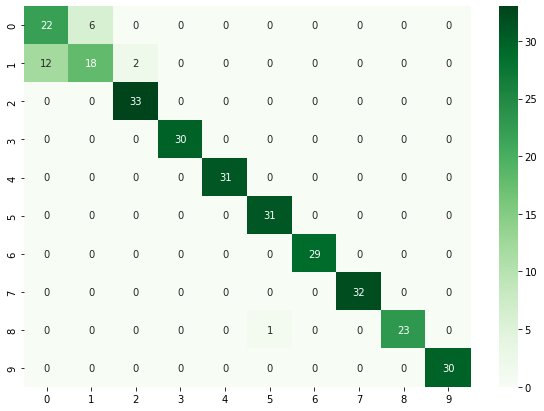

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.79      0.71        28
           2       0.75      0.56      0.64        32
           3       0.94      1.00      0.97        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       0.97      1.00      0.98        31
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        32
           9       1.00      0.96      0.98        24
          10       1.00      1.00      1.00        30

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


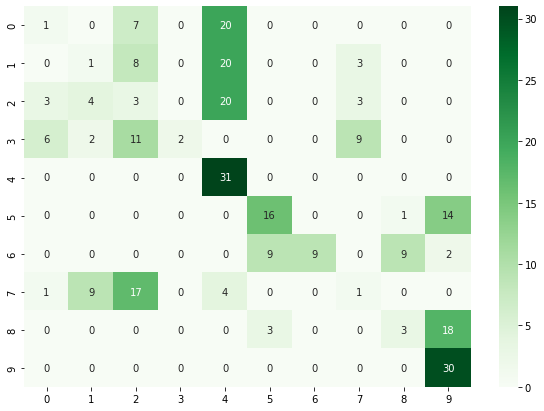

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.09      0.04      0.05        28
           2       0.06      0.03      0.04        32
           3       0.07      0.09      0.08        33
           4       1.00      0.07      0.12        30
           5       0.33      1.00      0.49        31
           6       0.57      0.52      0.54        31
           7       1.00      0.31      0.47        29
           8       0.06      0.03      0.04        32
           9       0.23      0.12      0.16        24
          10       0.47      1.00      0.64        30

    accuracy                           0.32       300
   macro avg       0.39      0.32      0.26       300
weighted avg       0.38      0.32      0.26       300



# **ALGORITMO 3**

In [ ]:
import pandas as pd

temp_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg3.csv")
temp_alg3 = temp_alg3.drop(['Unnamed: 0'], axis=1)
print(temp_alg3)

volt_alg3 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg3.csv")
volt_alg3 = volt_alg3.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg3)

     id  alg  time    3    4    5    6    7    8    9  ...  99993  99994  \
0     1    1     1  941  939  941  941  941  940  940  ...    941    941   
1     1    1     2  941  941  941  942  940  940  940  ...    941    940   
2     1    1     3  941  941  940  941  940  939  940  ...    941    940   
3     1    1     4  941  941  940  939  940  940  940  ...    939    940   
4     1    1     5  941  940  940  940  940  940  940  ...    940    941   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    1   996  939  939  941  939  940  939  940  ...    940    938   
996  10    1   997  941  941  940  938  940  939  940  ...    938    939   
997  10    1   998  940  939  941  941  940  938  940  ...    940    939   
998  10    1   999  939  940  939  940  938  939  940  ...    940    940   
999  10    1  1000  939  940  939  939  939  940  939  ...    940    939   

     99995  99996  99997  99998  99999  100000  100001  100002  
0      941    940    9

In [ ]:
alg3 = pd.merge(temp_alg3, volt_alg3, on='time', suffixes=('_1', '_2'))
alg3

,id,alg,time,3_1,4_1,5_1,6_1,7_1,8_1,9_1,...,99993_2,99994_2,99995_2,99996_2,99997_2,99998_2,99999_2,100000_2,100001_2,100002_2
0,1,1,1,941,939,941,941,941,940,940,...,1489,1490,1490,1491,1490,1489,1490,1489,1489,1490
1,1,1,2,941,941,941,942,940,940,940,...,1489,1489,1490,1490,1490,1489,1489,1490,1490,1490
2,1,1,3,941,941,940,941,940,939,940,...,1490,1491,1489,1490,1489,1489,1490,1489,1490,1489
3,1,1,4,941,941,940,939,940,940,940,...,1490,1490,1491,1489,1490,1489,1489,1490,1490,1490
4,1,1,5,941,940,940,940,940,940,940,...,1490,1489,1490,1490,1490,1491,1490,1490,1490,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,1,996,939,939,941,939,940,939,940,...,1503,1503,1503,1504,1503,1503,1503,1504,1502,1505
996,10,1,997,941,941,940,938,940,939,940,...,1503,1503,1502,1502,1503,1503,1503,1504,1503,1503
997,10,1,998,940,939,941,941,940,938,940,...,1503,1503,1503,1503,1502,1503,1503,1503,1503,1503
998,10,1,999,939,940,939,940,938,939,940,...,1503,1503,1503,1503,1503,1502,1503,1503,1504,1503


In [ ]:
Y = alg3.iloc[:,0]
Y

0       1
1       1
2       1
3       1
4       1
       ..
995    10
996    10
997    10
998    10
999    10
Name: id, Length: 1000, dtype: int64

In [ ]:
X = alg3.iloc[:, 3:]
X

,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,11_1,12_1,...,99993_2,99994_2,99995_2,99996_2,99997_2,99998_2,99999_2,100000_2,100001_2,100002_2
0,941,939,941,941,941,940,940,940,941,940,...,1489,1490,1490,1491,1490,1489,1490,1489,1489,1490
1,941,941,941,942,940,940,940,941,941,941,...,1489,1489,1490,1490,1490,1489,1489,1490,1490,1490
2,941,941,940,941,940,939,940,941,941,940,...,1490,1491,1489,1490,1489,1489,1490,1489,1490,1489
3,941,941,940,939,940,940,940,941,940,940,...,1490,1490,1491,1489,1490,1489,1489,1490,1490,1490
4,941,940,940,940,940,940,940,941,942,941,...,1490,1489,1490,1490,1490,1491,1490,1490,1490,1489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,939,939,941,939,940,939,940,939,940,939,...,1503,1503,1503,1504,1503,1503,1503,1504,1502,1505
996,941,941,940,938,940,939,940,939,939,939,...,1503,1503,1502,1502,1503,1503,1503,1504,1503,1503
997,940,939,941,941,940,938,940,939,940,940,...,1503,1503,1503,1503,1502,1503,1503,1503,1503,1503
998,939,940,939,940,938,939,940,940,939,940,...,1503,1503,1503,1503,1503,1502,1503,1503,1504,1503


### **kNN**


In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

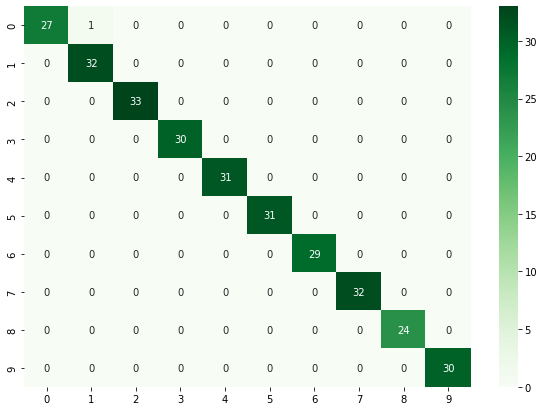

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


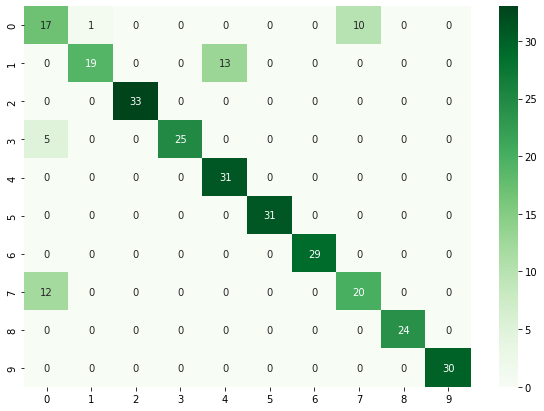

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.61      0.55        28
           2       0.95      0.59      0.73        32
           3       1.00      1.00      1.00        33
           4       1.00      0.83      0.91        30
           5       0.70      1.00      0.83        31
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        29
           8       0.67      0.62      0.65        32
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        30

    accuracy                           0.86       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.86      0.86       300

